In [ ]:
#linear regression & evalution matrix-2.ipynb_


#1. What does R-squared represent in a regression model?
R-squared in a regression model:

R-squared 𝑅2R 2) represents the proportion of variance in the dependent variable that is explained by
 the independent variables in the model. It ranges from 0 to 1, where higher values indicate better model fit.


[ ]
#2.What are the assumptions of linear regression:
Linearity: The relationship between independent and dependent variables is linear.
Independence: Observations are independent of each other.
Homoscedasticity: Constant variance of residuals.
Normality: Residuals are normally distributed.
No multicollinearity: Independent variables should not be highly correlated.

[ ]
#3.What is the difference between R-squared and Adjusted R-squared:
Adjusted 𝑅2R 2
  adjusts for the number of predictors in the model. Unlike
𝑅
2
R
2
 , it penalizes adding irrelevant features. If an additional predictor does not improve the model significantly, Adjusted
𝑅
2
R
2
  decreases.

[ ]
#4.Why do we use Mean Squared Error (MSE):
MSE is used because it penalizes larger errors more than smaller ones due to squaring, making it sensitive to outliers.
It provides a good measure of model performance.

[ ]
#5What does an Adjusted R-squared value of 0.85 indicate:
It indicates that 85% of the variance in the dependent variable is explained by the independent variables,
 after adjusting for the number of predictors in the model.

[ ]
#6.How do we check for normality of residuals in linear regression
Use visualizations like histograms, Q-Q plots, and residual plots.
Perform statistical tests like the Shapiro-Wilk test or Kolmogorov-Smirnov test.

[ ]
#7.What is multicollinearity, and how does it impact regression:
Multicollinearity occurs when independent variables are highly correlated.
It can lead to unstable coefficient estimates,
making it difficult to determine the true effect of each variable.

[ ]
#8.What is Mean Absolute Error (MAE):
MAE is the average of absolute differences between predicted and actual values.
Unlike MSE, it does not square the errors, making it less sensitive to large errors.

[ ]
#9.What are the benefits of using an ML pipeline:
Automates the workflow.
Improves reproducibility.
Reduces human error.
Facilitates hyperparameter tuning and model comparison.

[ ]
#10.Why is RMSE considered more interpretable than MSE:
RMSE is in the same unit as the target variable, making it easier to interpret than MSE, which is squared.

[ ]
#11.What is pickling in Python, and how is it useful in ML:
Pickling is the process of serializing and saving Python objects to disk.
 It is useful for saving trained models so they can be reused without retraining.

[ ]
#12.What does a high R-squared value mean:
A high
𝑅
2
R
2 means that the independent variables explain a large proportion of the variance in the dependent variable..
However, it does not necessarily imply a good model if assumptions are violated.

[ ]
#13.What happens if linear regression assumptions are violated:
Results may be biased or misleading.
Coefficients may be inaccurate.
Model predictions may not generalize well.

[ ]
#14.How can we address multicollinearity in regression:
Remove highly correlated predictors.
Use Principal Component Analysis (PCA).
Apply Ridge or Lasso regression.

[ ]
#15.How can feature selection improve model performance in regression analysis:
Reduces overfitting.
Improves model interpretability.
Enhances computational efficiency.
Eliminates irrelevant or redundant variables.

[ ]
#16.How is Adjusted R-squared calculated:
Adjusted R-squared adjusts the R-squared value to account for the number of predictors in a model, preventing overfitting. The formula is:

𝑅
𝑎
𝑑
𝑗
2
=
1
−
(
(
1
−
𝑅
2
)
(
𝑛
−
1
)
𝑛
−
𝑘
−
1
)
R
adj
2
​
 =1−(
n−k−1
(1−R
2
 )(n−1)
​
 )
where
𝑅
2
R
2
  is the coefficient of determination,
𝑛
n is the number of observations, and
𝑘
k is the number of predictors.

[ ]
#17.Why is MSE sensitive to outliers:
Mean Squared Error (MSE) squares the residuals, giving more weight to large errors.
Since outliers have large residuals, they disproportionately increase the MSE,
 making it highly sensitive to extreme values.

[ ]
#18.What is the role of homoscedasticity in linear regression:
Homoscedasticity means that the variance of residuals is constant across all levels of the independent variables.
It ensures that OLS estimates remain unbiased and efficient. If violated (heteroscedasticity),
 standard errors may be incorrect, leading to unreliable hypothesis tests.

[ ]
#19. What is the role of homoscedasticity in linear regression:
RMSE is a common metric to evaluate model accuracy. It is calculated as:

𝑅
𝑀
𝑆
𝐸
=
∑
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
𝑛
RMSE=
n
∑(y
i
​
 −
y
^
​

i
​
 )
2

​

​

It provides an interpretable error metric in the same units as the dependent variable.

[ ]
#20.Why is pickling considered risky:
Pickling can be risky due to security vulnerabilities—loading a pickle file can execute arbitrary code,
 leading to malicious exploits. Additionally,
pickled models may not be portable across different Python versions or environments.

[ ]
#21.What alternatives exist to pickling for saving ML models:
Joblib (efficient for large NumPy arrays)
ONNX (Open Neural Network Exchange, for interoperability)
TensorFlow SavedModel (for deep learning models)
JSON/YAML (for lightweight model parameter storage)

[ ]
#22.What is heteroscedasticity, and why is it a problem:
Heteroscedasticity occurs when the variance of residuals is not constant. It can lead to:

Biased standard errors, distorting hypothesis testing
Inefficient OLS estimates, reducing prediction reliability
Violation of regression assumptions, affecting model interpretability

[ ]
#23.How can interaction terms enhance a regression model's predictive power?
Interaction terms (e.g.,
𝑋
1
×
𝑋
2
X
1
​

Statements must be separated by newlines or semicolons
"predictor" is not defined(reportUndefinedVariable)
Loading...

No quick fixes available

[ ]



C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


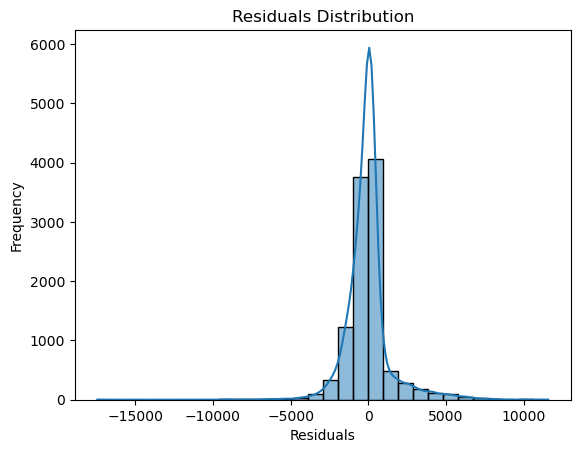

In [1]:
#PRACTICAL EXAMPLES
#1.Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
#using Seaborn's "diamonds" dataset.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Selecting numerical features
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Handling missing values (if any)
X = X.dropna()
y = y.loc[X.index]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Visualizing residuals
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [ ]:
2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

    from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compute error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


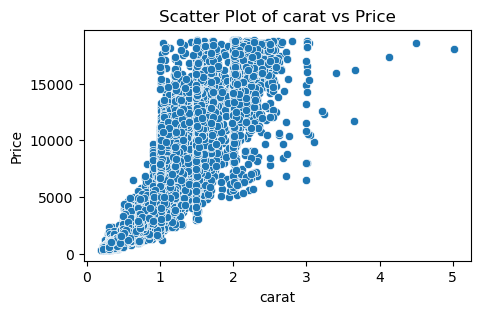

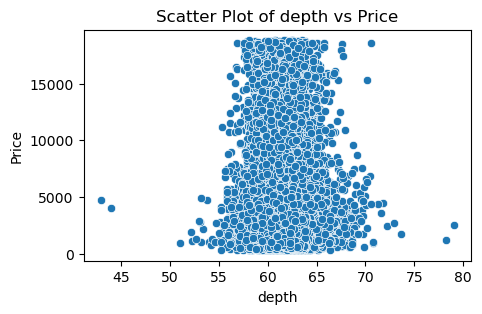

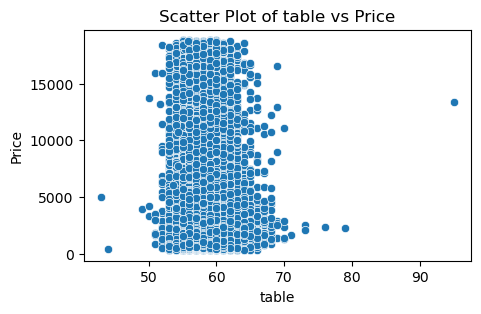

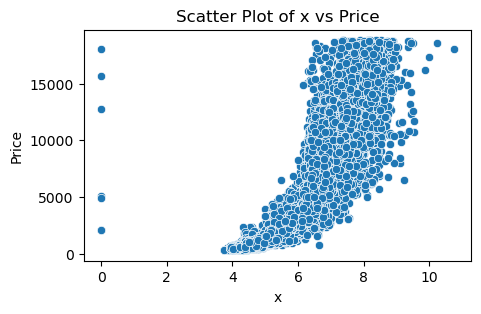

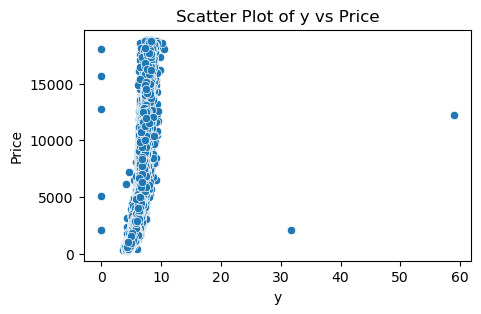

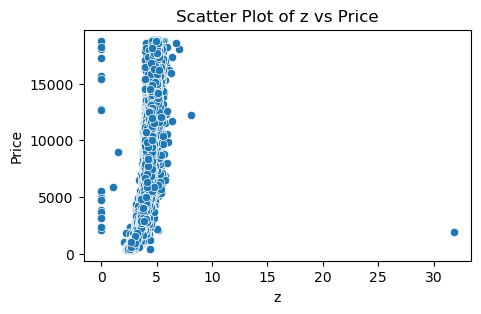

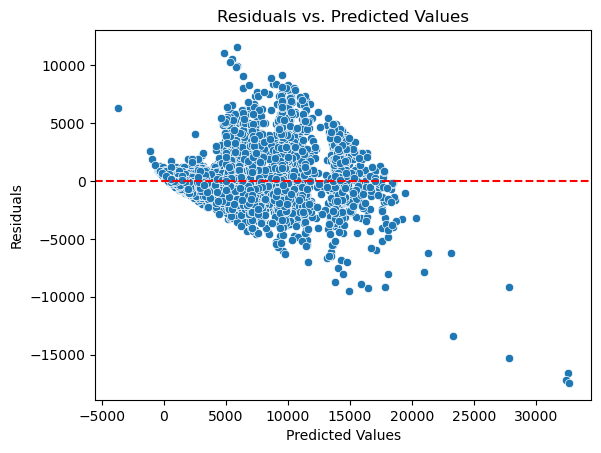

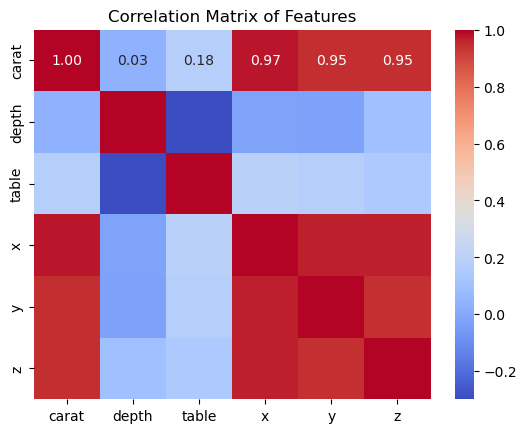

In [6]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
#linearity, residuals_plot_for_homoscedasticity_and correlation_matrix for multicollinearity.
import seaborn as sns

# Scatter plot to check linearity
for col in X_train.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.show()

# Residual plot for homoscedasticity
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# Correlation matrix for multicollinearity
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [7]:
#4.Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
#performance of different regression models

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Evaluate models
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Print results
for model, mse in results.items():
    print(f"{model}: MSE = {mse:.4f}")


Linear Regression: MSE = 0.5559
Ridge Regression: MSE = 0.5559
Random Forest: MSE = 0.2552
Support Vector Regression: MSE = 0.3570


Coefficient: 0.1050
Intercept: 0.9203
R-squared score: 0.4566


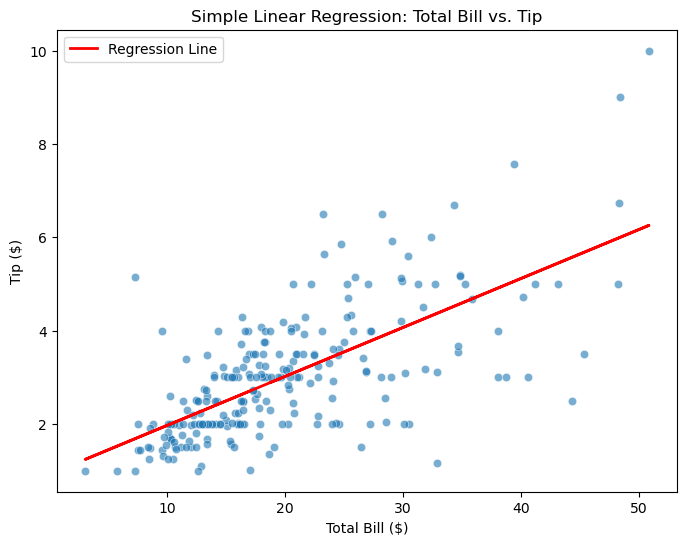

In [8]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
#R-squared score.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the tips dataset
tips = sns.load_dataset("tips")

# Select features
X = tips[['total_bill']]  # Predictor
y = tips['tip']  # Response variable

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Print model parameters
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared score: {r2_score(y, y_pred):.4f}")

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], alpha=0.6)
plt.plot(tips['total_bill'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Simple Linear Regression: Total Bill vs. Tip')
plt.legend()
plt.show()

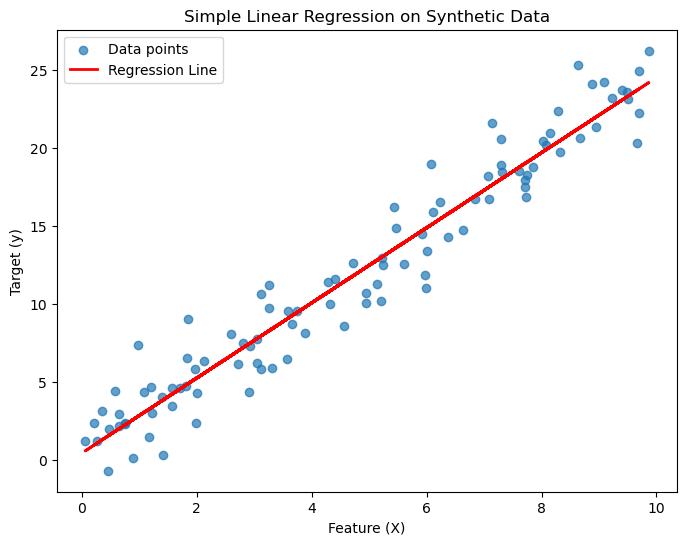

In [10]:
#6.Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
#simple linear regression and visualizes the results.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 2.5 * X + np.random.randn(100, 1) * 2  # Target with noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data points")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Simple Linear Regression on Synthetic Data")
plt.legend()
plt.show()

In [11]:
#7.Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
#model to predict new values and plot the data points along with the regression line.
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + np.random.randn(100, 1) * 2

# Train model
model = LinearRegression()
model.fit(X, y)

# Save the model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


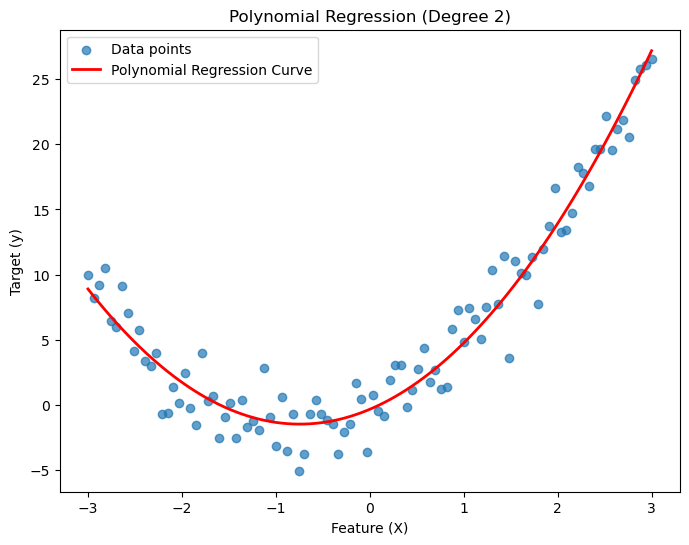

In [12]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 2

# Transform features for polynomial regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data points")
plt.plot(X, y_pred, color='red', linewidth=2, label="Polynomial Regression Curve")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


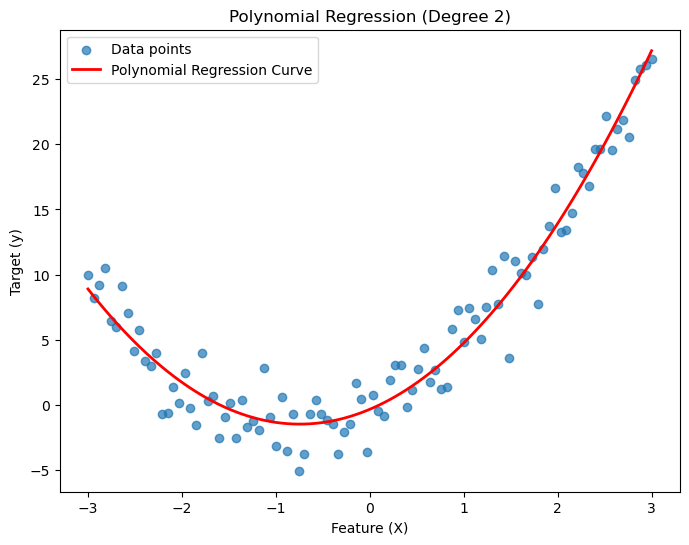

In [13]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
#regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 2

# Transform features for polynomial regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data points")
plt.plot(X, y_pred, color='red', linewidth=2, label="Polynomial Regression Curve")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

In [14]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
#regression model to the data. Print the model's coefficient and intercept.
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 4 * X + np.random.randn(100, 1) * 2  # Target with some noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


Coefficient: 3.9080
Intercept: 0.4302


In [15]:
#11.Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
#compares their performance.
degrees = [1, 2, 3, 4]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    print(f"Degree {d} R^2: {model.score(X_poly, y)}")


Degree 1 R^2: 0.9764567983510799
Degree 2 R^2: 0.977314682149193
Degree 3 R^2: 0.9774527037444614
Degree 4 R^2: 0.9777132542932724


In [19]:
#12.Write a Python script that fits a simple linear regression model with two features and prints the model's
#coefficients, intercept, and R-squared score.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.5  # y = 3x1 + 5x2 + noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print model details
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))


Coefficients: [3.12725678 5.23707995]
Intercept: -0.14166425030515706
R-squared score: 0.912911977442031


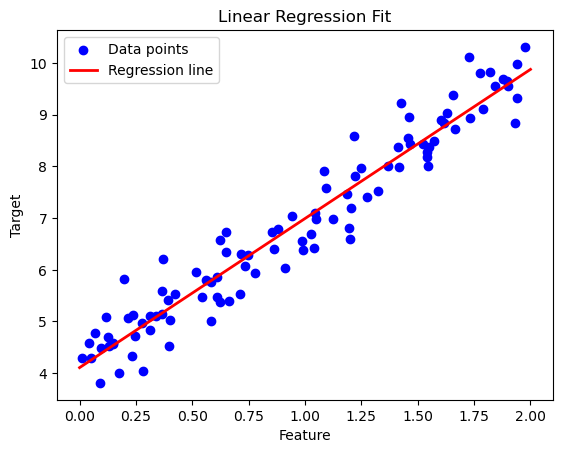

In [20]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
#regression line along with the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X[:, 0] + np.random.randn(100) * 0.5  # y = 4 + 3x + noise

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_line)

# Plot the data and regression line
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_line, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [21]:
#14.Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
#with multiple features.

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, _ = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


     Feature       VIF
0  Feature_1  1.019320
1  Feature_2  1.012651
2  Feature_3  1.059337
3  Feature_4  1.046592
4  Feature_5  1.020596


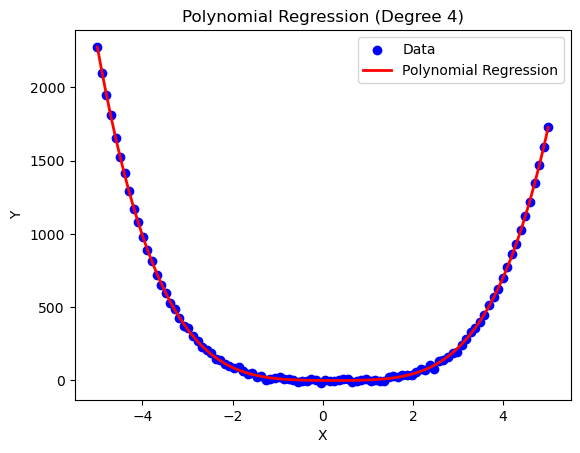

In [38]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
#polynomial regression model, and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = 3*x**4 - 2*x**3 + 5*x**2 - 4*x + np.random.normal(scale=10, size=x.shape)

# Reshape x for sklearn
x = x.reshape(-1, 1)

# Create polynomial regression model of degree 4
model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Plot the results
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression (Degree 4)')
plt.show()


In [24]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
#linear regression model, and prints the R-squared score.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
r2_score = pipeline.score(X_test, y_test)
print(f"R-squared Score: {r2_score:.4f}")


R-squared Score: 1.0000


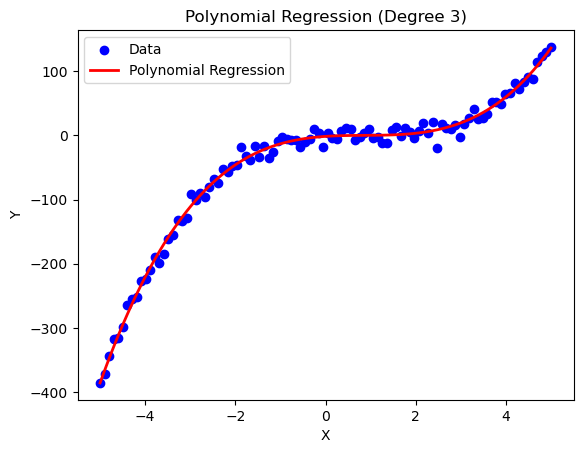

In [37]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
#regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = 2*x**3 - 5*x**2 + 3*x + np.random.normal(scale=10, size=x.shape)

# Reshape x for sklearn
x = x.reshape(-1, 1)

# Create polynomial regression model of degree 3
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Plot the results
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression (Degree 3)')
plt.show()


In [26]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
#the R-squared score and model coefficients.
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Fit model
model = LinearRegression().fit(X, y)

# Print R-squared score and coefficients
print(f"R-squared Score: {model.score(X, y):.4f}")
print("Coefficients:", model.coef_)


R-squared Score: 1.0000
Coefficients: [60.59000738 98.65432927 64.55891226 57.05696343 35.60947647]


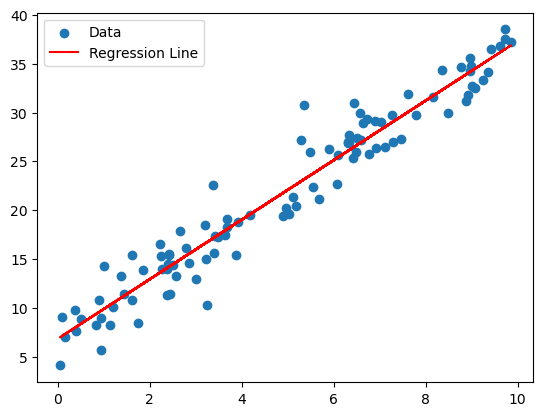

In [27]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
#data points along with the regression line.
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 7 + np.random.randn(100) * 2

# Fit model
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.legend()
plt.show()


In [28]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-
#squared score and coefficients.
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
model = LinearRegression().fit(X, y)
print(f"R-squared Score: {model.score(X, y):.4f}")
print("Coefficients:", model.coef_)


R-squared Score: 1.0000
Coefficients: [28.2045949  75.05077568 17.75449804]


In [29]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
#joblib instead of pickling.
import joblib

# Save model
joblib.dump(model, "linear_regression_model.pkl")

# Load model
loaded_model = joblib.load("linear_regression_model.pkl")
print(f"Loaded Model R-squared: {loaded_model.score(X, y):.4f}")


Loaded Model R-squared: 1.0000


In [30]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
#the Seaborn 'tips' dataset.
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Load data
df = sns.load_dataset('tips')
X = df[['total_bill', 'size', 'sex']]
y = df['tip']

# One-hot encode categorical feature
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['sex'])], remainder='passthrough')
pipeline = make_pipeline(preprocessor, LinearRegression())

# Fit and evaluate
pipeline.fit(X, y)
print(f"R-squared Score: {pipeline.score(X, y):.4f}")


R-squared Score: 0.4680


In [36]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-
#squared score.
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Train models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Evaluate models (R-squared score)
r2_lin = lin_reg.score(X_test, y_test)
r2_ridge = ridge_reg.score(X_test, y_test)

# Print results
print(f"Linear Regression R-squared: {r2_lin:.4f}")
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")
print("\nLinear Regression Coefficients:", lin_reg.coef_)
print("\nRidge Regression Coefficients:", ridge_reg.coef_)



Linear Regression R-squared: 0.9944
Ridge Regression R-squared: 0.9940

Linear Regression Coefficients: [61.52208912 98.47253675 61.09969936 55.54150072 35.97411246]

Ridge Regression Coefficients: [60.80641691 96.97650095 59.85083263 54.82588222 35.69887237]


In [35]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
#ataset.
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print results
print("Cross-Validation R-squared Scores:", cv_scores)
print(f"Mean R-squared Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_scores.std():.4f}")


Cross-Validation R-squared Scores: [0.98012075 0.9844046  0.98981268 0.98405405 0.97718464]
Mean R-squared Score: 0.9831
Standard Deviation of R-squared: 0.0043


In [34]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the R-
#squared score for each.
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = sns.load_dataset('tips')

# Define features (including categorical) and target
X = df[['total_bill', 'size', 'sex']]
y = df['tip']

# One-hot encoding for categorical variables
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['sex'])
], remainder='passthrough')

# Create pipeline
pipeline = make_pipeline(preprocessor, LinearRegression())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate model
r2_score = pipeline.score(X_test, y_test)
print(f"R-squared Score: {r2_score:.4f}")


R-squared Score: 0.4792
